# DataCamp Certification Case Study

### Project Brief

Congratulations, you have just landed your first job as a data scientist at Nearly New Nautical! Nearly New Nautical is a website that allows users to advertise their used boats for sale. To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views. 

The product manager wants to know if you can develop a model to predict the number of views a listing will receive based on the boat's features. She would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.

In addition, she has noticed that many users never complete the introductory survey to list their boat. She suspects that it is too long and has asked you whether some features are more predictive of views than others. If so, she may be able to trim the length of the survey and increase the number of people who sign up.

You will need to present your findings in two formats:
- First, you will need to present your findings to the product manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

IMPORTING MODULES AND LOADING DATA

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelBinarizer

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [448]:
data=pd.read_csv("boat_data.csv")
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00000,1.90000,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00000,1.50000,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69000,1.42000,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00000,1.00000,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55000,1.46000,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


                              DATA CLEANING 

In [449]:
data.shape

(9888, 10)

There 9888 rows and 10 columns in our dataset

In [450]:
data.describe()


,Year Built,Length,Width,Number of views last 7 days
count,9888.00000,9879.00000,9832.00000,9888.00000
mean,1893.19286,11.57002,3.52012,149.16080
std,460.20158,6.00282,1.22053,151.81975
min,0.00000,1.04000,0.01000,13.00000
25%,1996.00000,7.47000,2.54000,70.00000
50%,2007.00000,10.28000,3.33000,108.00000
75%,2017.00000,13.93000,4.25000,172.00000
max,2021.00000,100.00000,25.16000,3263.00000


As it can be seen from the above table, some columns in "Year Built" column are zero. We first need to replace them with nan values so that we can drop them later.

In [451]:
data["Year Built"]=data["Year Built"].replace(0,np.nan)

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9337 non-null   float64
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 772.6+ KB


There are missing values in Manufacturer,Type,Length,Width,Material and Location columns. We first need to handle the misssing values before doing further analysis and building predictive models.

In [453]:
data=data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        6589 non-null   object 
 1   Boat Type                    6589 non-null   object 
 2   Manufacturer                 6589 non-null   object 
 3   Type                         6589 non-null   object 
 4   Year Built                   6589 non-null   float64
 5   Length                       6589 non-null   float64
 6   Width                        6589 non-null   float64
 7   Material                     6589 non-null   object 
 8   Location                     6589 non-null   object 
 9   Number of views last 7 days  6589 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 514.9+ KB


In [454]:
data.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                     float64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

Although we have dropped the missing values and cleaned the outliers, we haven't converted columns to proper data types yet. From the above results, it can be seen that Price column has an object type.This column needs to be converted into numerical values.

In [455]:
data.Price=data.Price.str.replace("\D+","",regex=True).astype(int)
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3490,Center console boat,Terhi power boats,new boat from stock,2020.00000,4.00000,1.50000,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,3399,Fishing Boat,Linder power boats,new boat from stock,2019.00000,3.55000,1.46000,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987.00000,4.35000,1.75000,GRP,Switzerland Â» Seengen,239
3,3500,Sport Boat,GS Nautica power boats,Used boat,2004.00000,4.70000,2.00000,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,4600,Runabout,Kimple power boats,new boat from stock,2020.00000,4.40000,1.65000,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


In [456]:
data.describe()

,Price,Year Built,Length,Width,Number of views last 7 days
count,6589.00000,6589.00000,6589.00000,6589.00000,6589.00000
mean,290850.02808,2006.79329,11.23025,3.47646,161.81469
std,793743.56702,12.65258,5.18187,1.12242,170.82342
min,3399.00000,1901.00000,2.32000,0.86000,13.00000
25%,44990.00000,2000.00000,7.47000,2.55000,73.00000
50%,95000.00000,2008.00000,10.00000,3.30000,113.00000
75%,250000.00000,2018.00000,13.72000,4.20000,187.00000
max,23500000.00000,2021.00000,56.00000,16.00000,3263.00000


                            EXPLORATORY DATA ANALYSIS

Balancing categorical variables: To make the model unbiased towards select values in each category, underrepresented values will be dropped.

In [457]:
data.nunique()

Price                          1949
Boat Type                       109
Manufacturer                    807
Type                             23
Year Built                       78
Length                         1341
Width                           493
Material                         10
Location                       2314
Number of views last 7 days     654
dtype: int64

In [458]:

data.Manufacturer.value_counts()

BÃ©nÃ©teau power boats                        528
Jeanneau power boats                          384
Sunseeker power boats                         332
Sea Ray power boats                           185
Princess power boats                          183
Cranchi power boats                           181
Azimut power boats                            170
Quicksilver (Brunswick Marine) power boats    150
Bavaria power boats                           124
Fairline power boats                          122
Bayliner power boats                          113
Prestige Yachts power boats                   105
Sessa power boats                             105
Sealine power boats                           104
Linssen power boats                            66
Regal power boats                              61
Riva power boats                               60
Galeon power boats                             55
Windy power boats                              54
Boesch power boats                             51


In [459]:
data=data[data.groupby("Manufacturer")['Manufacturer'].transform('size') > 20]

data["Manufacturer"].value_counts()

BÃ©nÃ©teau power boats                        528
Jeanneau power boats                          384
Sunseeker power boats                         332
Sea Ray power boats                           185
Princess power boats                          183
Cranchi power boats                           181
Azimut power boats                            170
Quicksilver (Brunswick Marine) power boats    150
Bavaria power boats                           124
Fairline power boats                          122
Bayliner power boats                          113
Sessa power boats                             105
Prestige Yachts power boats                   105
Sealine power boats                           104
Linssen power boats                            66
Regal power boats                              61
Riva power boats                               60
Galeon power boats                             55
Windy power boats                              54
Boesch power boats                             51


To make our columns more useful for the machine learning, I will split Type column into two seperate columns called Condition and Fuel.

In [460]:
data[["Condition","Fuel"]]=data.Type.str.split(",",expand=True)
data=data.drop("Type",axis=1)

Next, I will drop category values which don't have enough representation.

In [461]:
data=data[data.groupby("Fuel")['Fuel'].transform('size') > 1]
data=data[data.groupby("Condition")['Condition'].transform('size') > 1]
data=data[data.groupby("Material")['Material'].transform('size') > 1]
data.head()

,Price,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Condition,Fuel
6,4000,Pilothouse,BÃ©nÃ©teau power boats,1981.00000,8.00000,2.84000,PVC,"France Â» MARTGUES, MARTIGUES",265,Used boat,Diesel
14,3800,Fishing Boat,Quicksilver (Brunswick Marine) power boats,1996.00000,4.41000,1.71000,Aluminium,Switzerland Â» Luganersee Â» Bioggio-Lugano,255,Used boat,Unleaded
19,5500,Center console boat,Saver power boats,1997.00000,4.40000,1.78000,PVC,"Spain Â» Cabo de Palos, Espagne",118,Used boat,Unleaded
28,6500,Cabin Boat,Cranchi power boats,1990.00000,6.28000,2.27000,GRP,Italy Â» Venezia,85,Used boat,Diesel
35,7000,Cabin Boat,Fjord power boats,1980.00000,7.26000,2.90000,GRP,Switzerland Â» Lake Geneva Â» Roche,866,Used boat,Unleaded


In [462]:
data.dtypes

Price                            int64
Boat Type                       object
Manufacturer                    object
Year Built                     float64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Condition                       object
Fuel                            object
dtype: object

In [463]:
data=data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        3566 non-null   int64  
 1   Boat Type                    3566 non-null   object 
 2   Manufacturer                 3566 non-null   object 
 3   Year Built                   3566 non-null   float64
 4   Length                       3566 non-null   float64
 5   Width                        3566 non-null   float64
 6   Material                     3566 non-null   object 
 7   Location                     3566 non-null   object 
 8   Number of views last 7 days  3566 non-null   int64  
 9   Condition                    3566 non-null   object 
 10  Fuel                         3566 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 306.6+ KB


Location column of our dataset contains many unneccessary information such as city, lake, postcode and etc. Therefore, I will filter all of the rows to only contain country names.

In [464]:
data.Location=data.Location.str.replace("\^s+","")
data.Location=data.Location.str.replace("\Â.+","",regex=True)
data.Location=data.Location.str.replace("Martinique","France")
data.Location=data.Location.str.replace("Donau","Austria")
data.Location=data.Location.str.replace("Lake Geneva","Switzerland")
data.Location=data.Location.str.replace("Lake Constance","Switzerland")
data.Location=data.Location.str.replace("Ostsee","Sweden")
data.Location=data.Location.str.strip("(Hrvatska)")
data=data[data.groupby("Location")['Location'].transform('size') > 40]
data["Location"].value_counts()

/var/folders/20/s_dsp9fn12l6yq_xjs5by4p40000gn/T/ipykernel_19601/2083021908.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Location=data.Location.str.replace("\^s+","")


France                 706
Germany                589
Spain                  386
Italy                  385
Switzerland            369
Croatia (Hrvatska)     312
Croatia                142
United Kingdom         108
Portugal                87
Netherlands             64
France                  59
Italy                   49
Austria                 49
Name: Location, dtype: int64

Boat Type column needs to cleaned for unuseful information.

In [465]:
data=data[~data["Boat Type"].str.contains(",")]
data=data[data.groupby("Boat Type")['Boat Type'].transform('size') > 1]
data["Boat Type"].value_counts()

Motor Yacht            958
Flybridge              519
Sport Boat             459
Pilothouse             280
Hardtop                266
Cabin Boat             196
Center console boat    130
Bowrider               120
Deck Boat              100
Trawler                 89
Pontoon Boat            22
Mega Yacht              17
Fishing Boat            15
Runabout                15
Offshore Boat           12
Classic                 11
Wakeboard/Wakesurf       2
Name: Boat Type, dtype: int64

In [466]:
data.nunique()

Price                          1263
Boat Type                        17
Manufacturer                     52
Year Built                       52
Length                          961
Width                           378
Material                          7
Location                         13
Number of views last 7 days     461
Condition                         4
Fuel                              4
dtype: int64

From the above results, we can see that our categorical variables has less unique values than it used to be.

Mean,standard deviation and other important metrics for each numerical column

In [467]:
data.describe()


,Price,Year Built,Length,Width,Number of views last 7 days
count,3211.00000,3211.00000,3211.00000,3211.00000,3211.00000
mean,288485.97353,2009.21053,11.51289,3.53452,144.32046
std,635266.28681,9.83521,4.85887,1.02184,152.87858
min,3800.00000,1965.00000,3.00000,1.01000,15.00000
25%,54999.50000,2003.50000,7.90000,2.59000,68.00000
50%,115376.00000,2010.00000,10.41000,3.35000,105.00000
75%,279000.00000,2019.00000,13.92000,4.22000,167.00000
max,11900000.00000,2021.00000,40.23000,9.98000,3263.00000


In [468]:
data.corr()


,Price,Year Built,Length,Width,Number of views last 7 days
Price,1.00000,0.13873,0.68023,0.60193,-0.03089
Year Built,0.13873,1.00000,-0.12351,-0.13059,-0.25504
Length,0.68023,-0.12351,1.00000,0.92645,-0.11873
Width,0.60193,-0.13059,0.92645,1.00000,-0.11857
Number of views last 7 days,-0.03089,-0.25504,-0.11873,-0.11857,1.00000


In [469]:
data["Price"]=np.log(data["Price"])
data["Number of views last 7 days"]=np.log(data["Number of views last 7 days"])
data=data[(data["Number of views last 7 days"]<7)&(data["Price"]<16)]



In [470]:
data.corr()

,Price,Year Built,Length,Width,Number of views last 7 days
Price,1.00000,0.25623,0.85055,0.82332,-0.23219
Year Built,0.25623,1.00000,-0.13075,-0.13882,-0.29453
Length,0.85055,-0.13075,1.00000,0.93545,-0.13750
Width,0.82332,-0.13882,0.93545,1.00000,-0.17220
Number of views last 7 days,-0.23219,-0.29453,-0.13750,-0.17220,1.00000


In [471]:
data.describe()

,Price,Year Built,Length,Width,Number of views last 7 days
count,3197.00000,3197.00000,3197.00000,3197.00000,3197.00000
mean,11.76092,2009.23585,11.49383,3.52904,4.68666
std,1.17614,9.80996,4.80109,1.00970,0.67967
min,8.24276,1965.00000,3.00000,1.01000,2.70805
25%,10.91509,2004.00000,7.90000,2.59000,4.21951
50%,11.65269,2010.00000,10.41000,3.35000,4.65396
75%,12.53897,2019.00000,13.92000,4.22000,5.11199
max,15.78960,2021.00000,34.53000,9.98000,6.94022


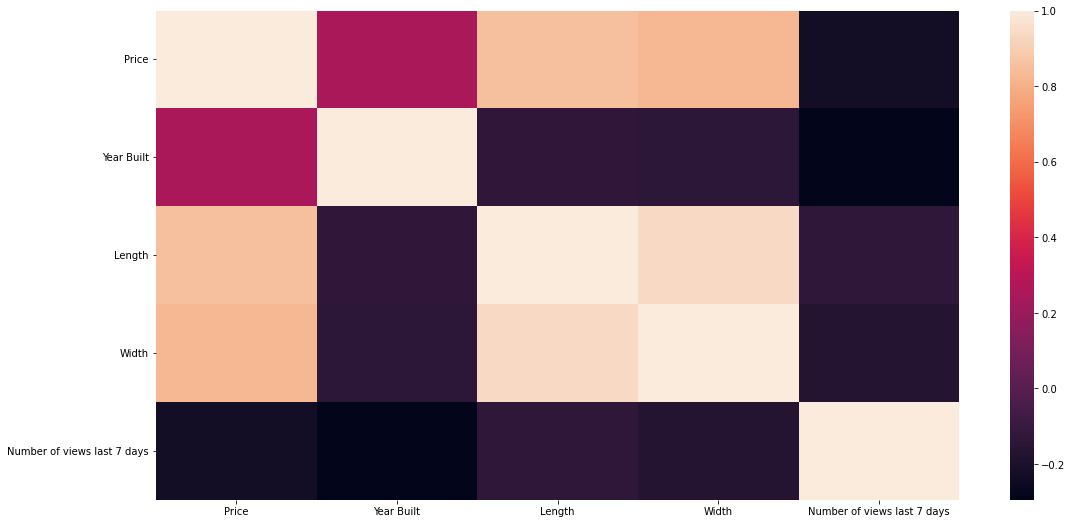

In [472]:
corr=data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr)
plt.yticks(rotation=0)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


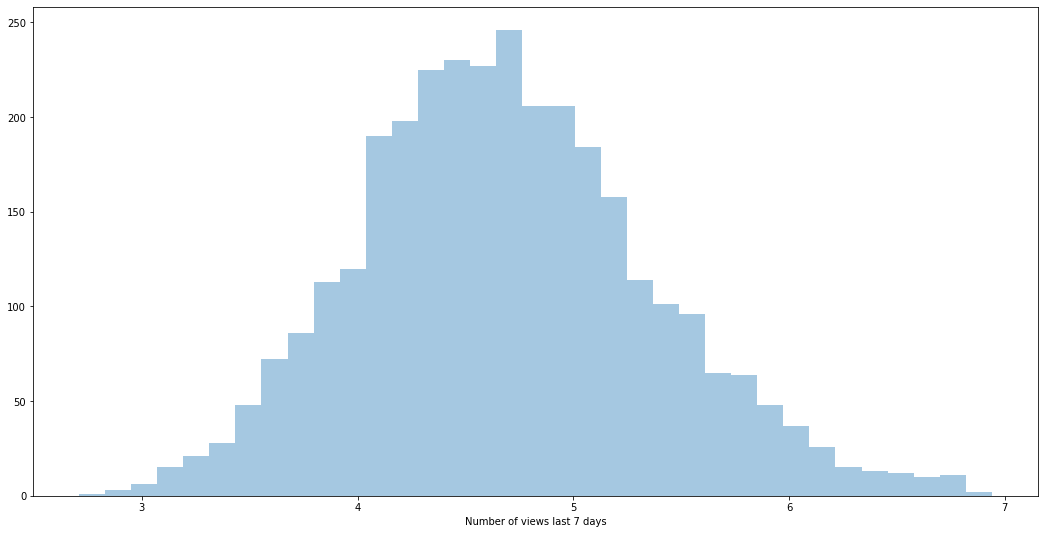

In [473]:
plt.figure(figsize=(18,9))
sns.distplot(data['Number of views last 7 days'], hist=True, kde=False, rug=False)
plt.show()

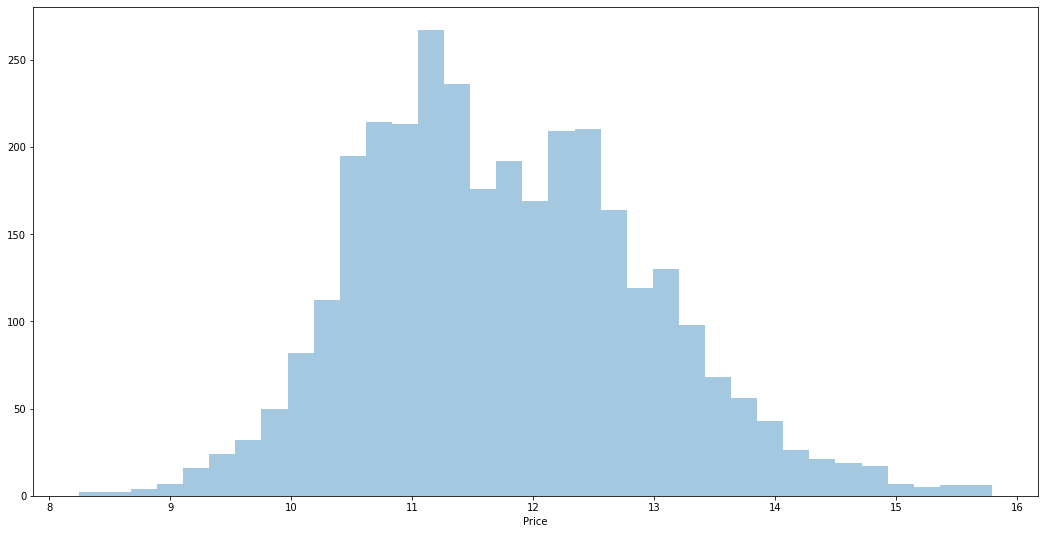

In [474]:
plt.figure(figsize=(18,9))
sns.distplot(data['Price'], hist=True, kde=False, rug=False)
plt.ticklabel_format(useOffset=False,style="plain")
plt.show()

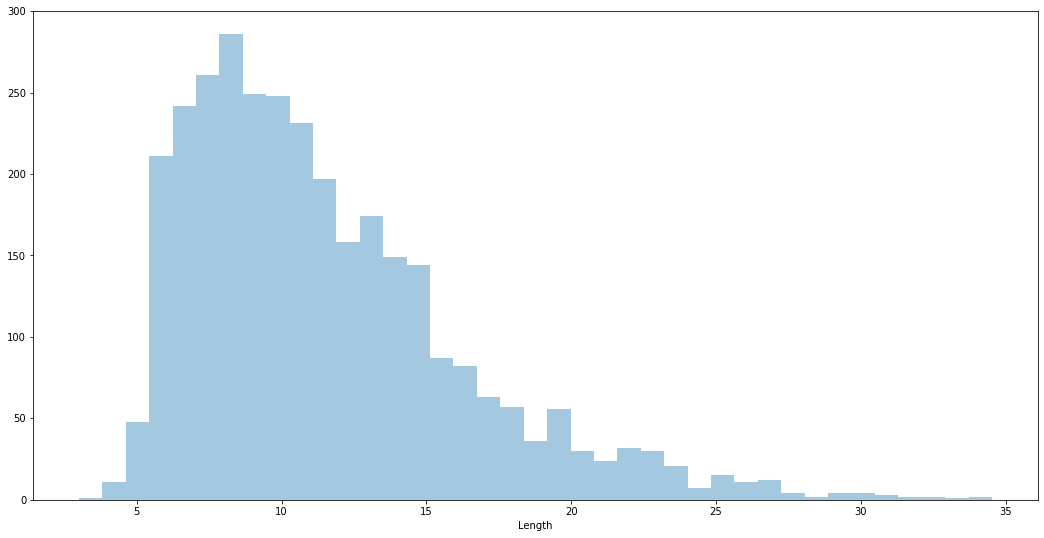

In [475]:
plt.figure(figsize=(18,9))
sns.distplot(data['Length'], hist=True, kde=False, rug=False)
plt.ticklabel_format(useOffset=False,style="plain")
plt.show()

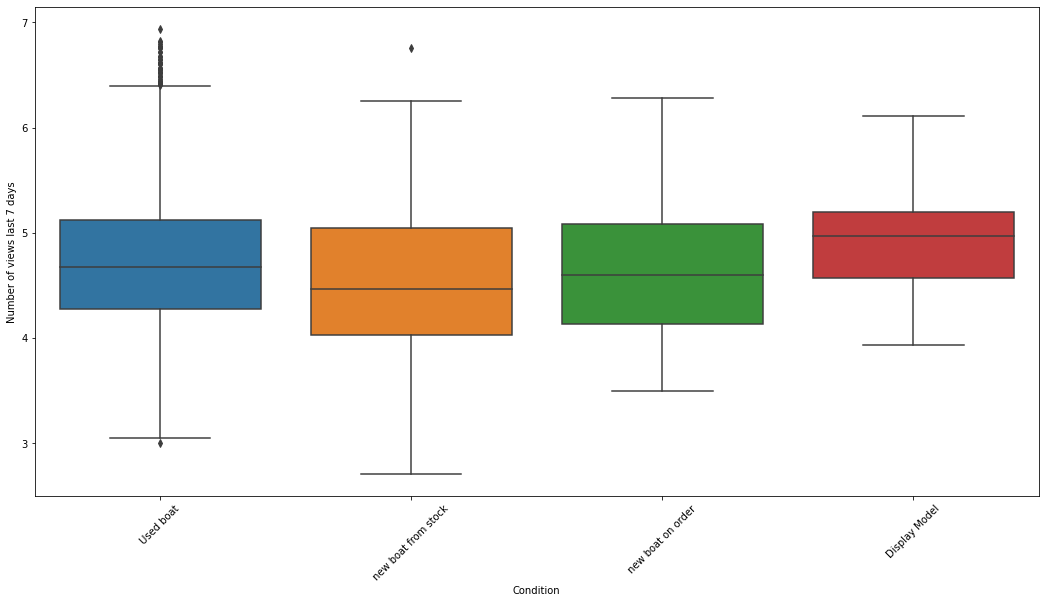

In [476]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Condition",y="Number of views last 7 days",data=data)
plt.xticks(rotation=45)
plt.show()

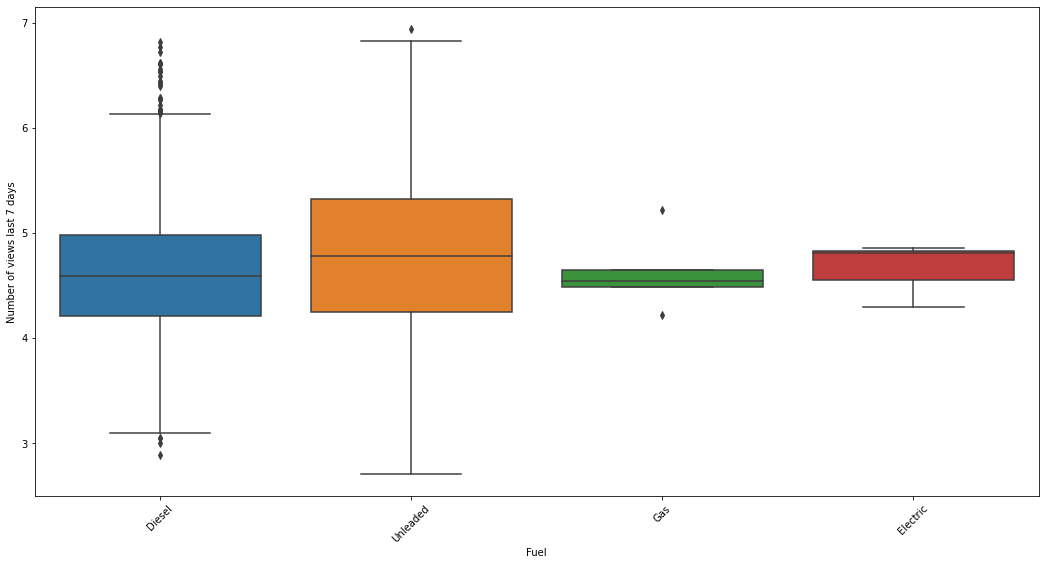

In [477]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Fuel",y="Number of views last 7 days",data=data)
plt.xticks(rotation=45)
plt.show()

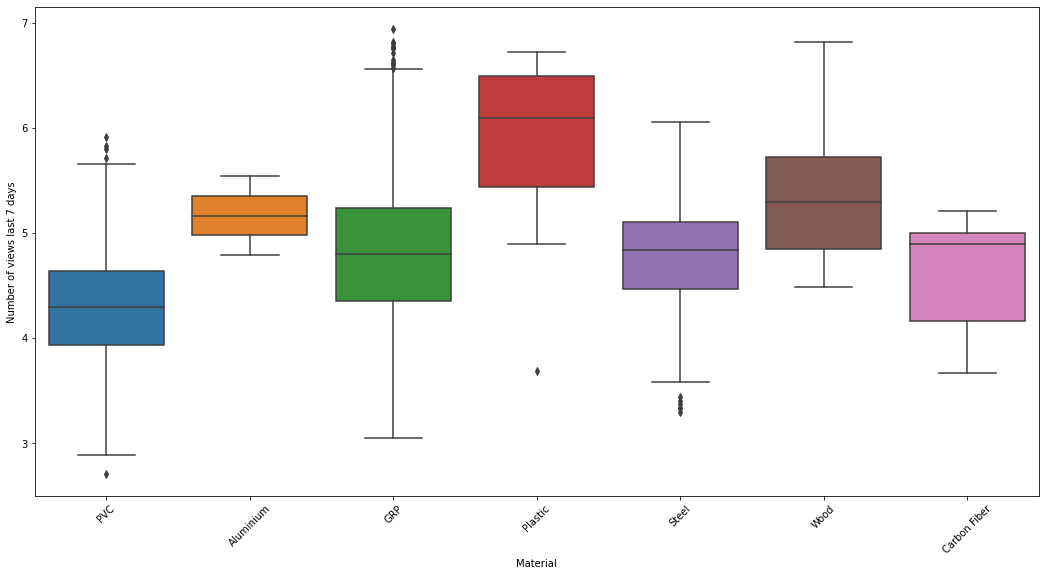

In [478]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Material",y="Number of views last 7 days",data=data)
plt.xticks(rotation=45)
plt.show()

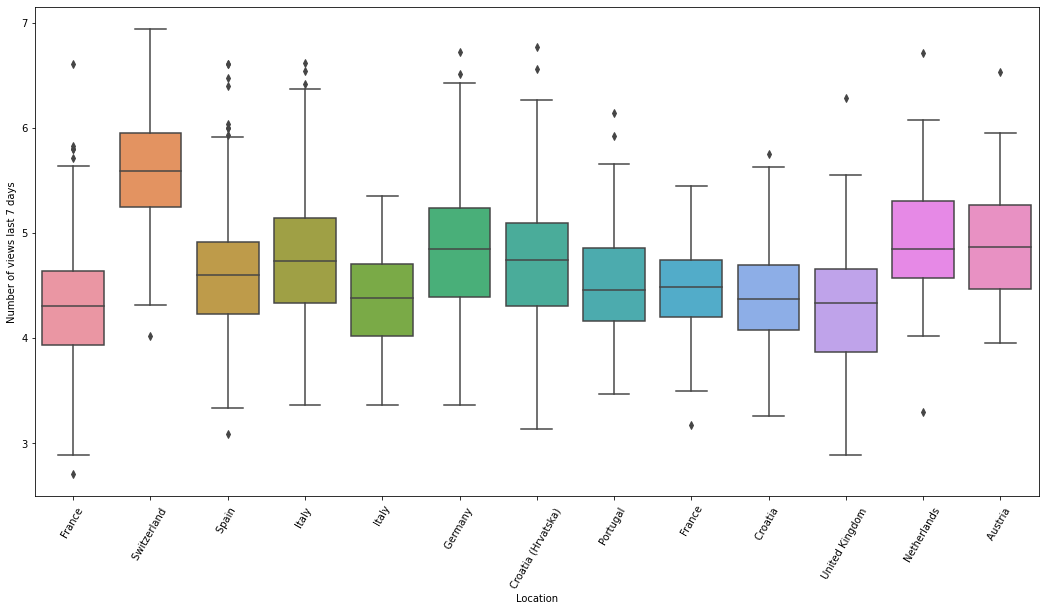

In [479]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Location",y="Number of views last 7 days",data=data)
plt.xticks(rotation=60)
plt.show()

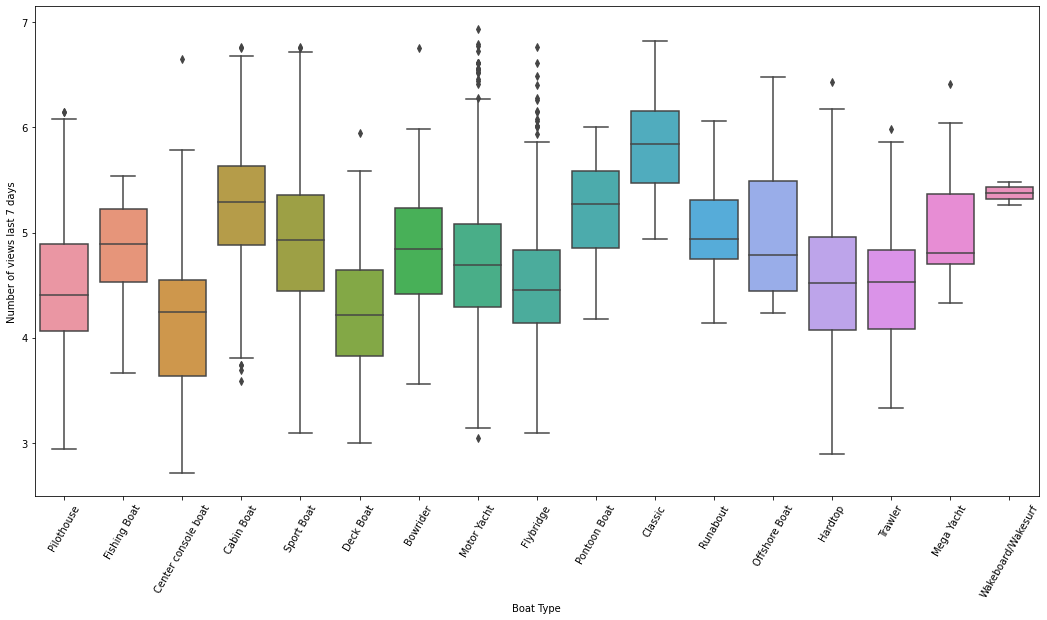

In [480]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Boat Type",y="Number of views last 7 days",data=data)
plt.xticks(rotation=60)
plt.show()

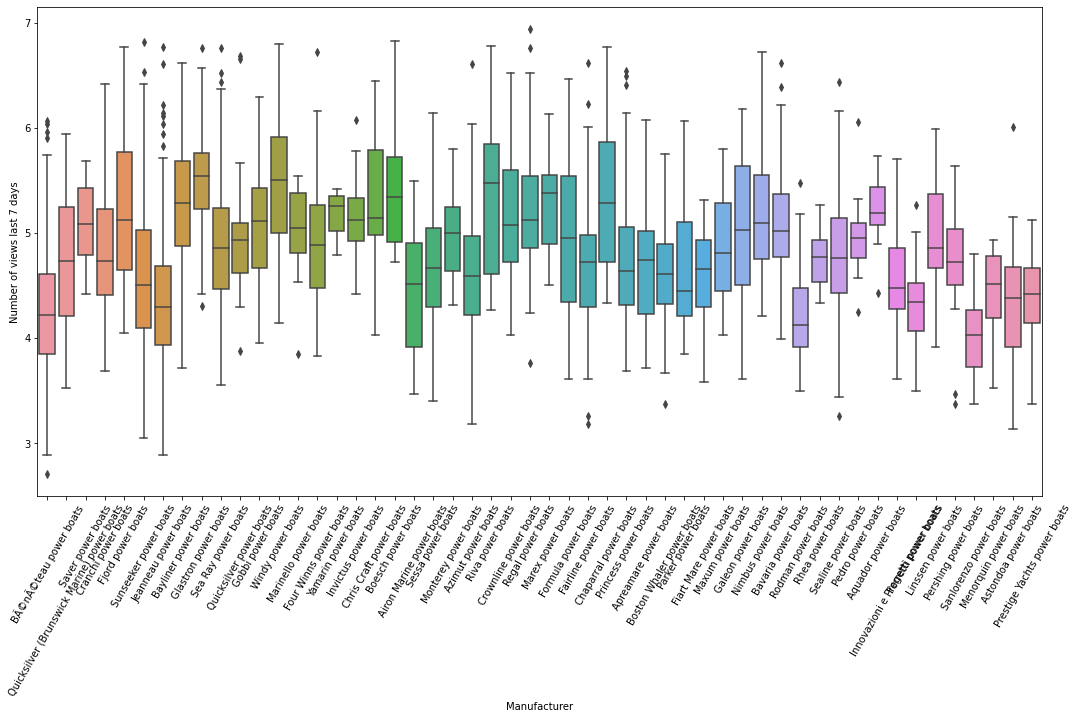

In [481]:
plt.figure(figsize=(18,9))
ax=sns.boxplot(x="Manufacturer",y="Number of views last 7 days",data=data)
plt.xticks(rotation=60)
plt.show()

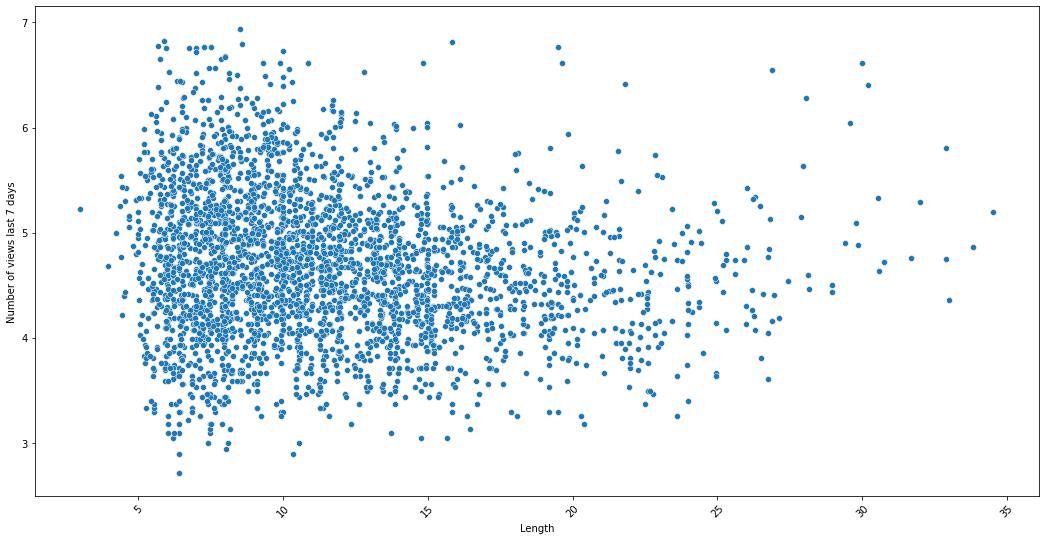

In [482]:
plt.figure(figsize=(18,9))
ax=sns.scatterplot(x="Length",y="Number of views last 7 days",data=data)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Width', ylabel='Number of views last 7 days'>

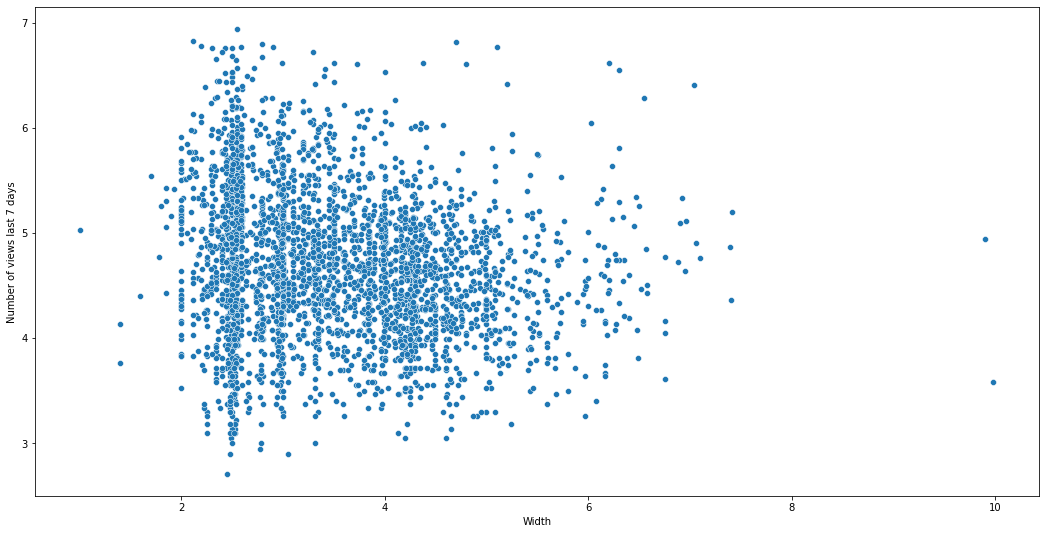

In [483]:
plt.figure(figsize=(18,9))
sns.scatterplot(x="Width",y="Number of views last 7 days",data=data)

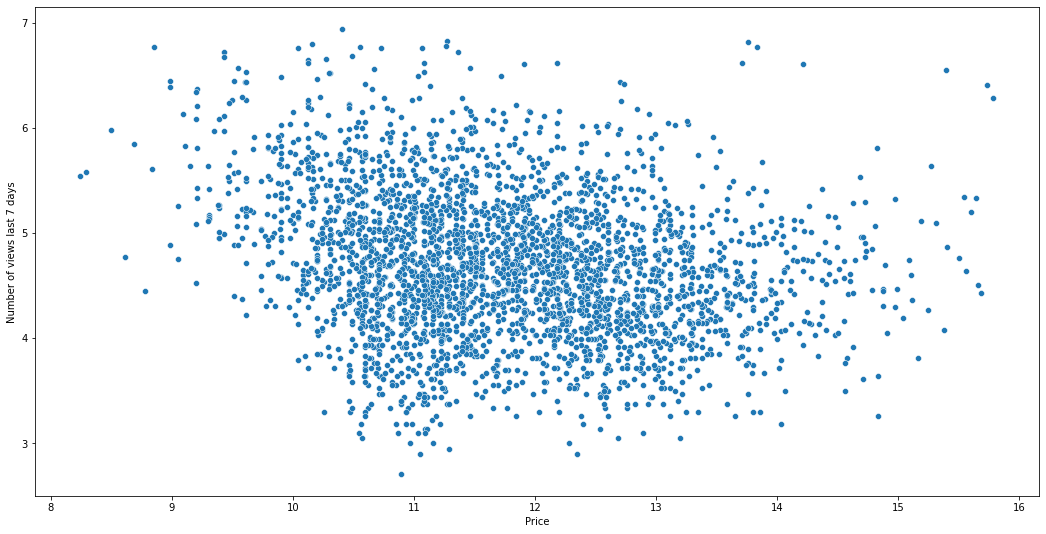

In [484]:
plt.figure(figsize=(18,9))
sns.scatterplot(x="Price",y="Number of views last 7 days",data=data)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)


<AxesSubplot:xlabel='Year Built', ylabel='Number of views last 7 days'>

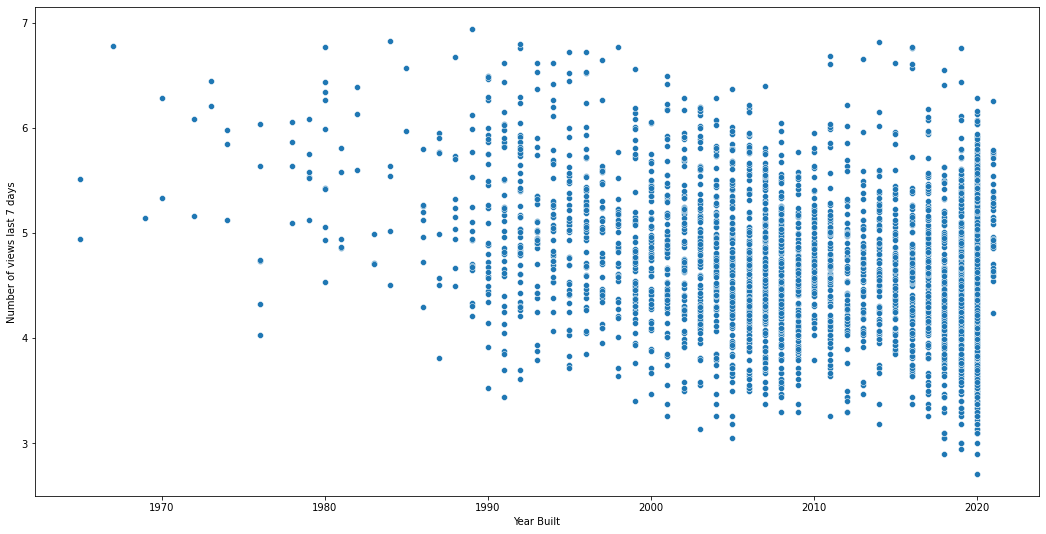

In [485]:
plt.figure(figsize=(18,9))
sns.scatterplot(x="Year Built",y="Number of views last 7 days",data=data)

                              PREPARING DATA FOR TRAINING A MODEL

Width and Length columns are highly correlated, therefore I will create a new column to improve the model performance by multiplying them with each other.

Creating dummy values for categorical columns and dropping unuseful categorical variables.

In [505]:
dummy_data=pd.get_dummies(data=data,columns=["Location","Manufacturer","Boat Type"],drop_first=True)
new_data=dummy_data.drop(["Width","Fuel","Condition","Material"],axis=1)



Creating explanotary and dependent variables

In [506]:
x=new_data.loc[:,new_data.columns!="Number of views last 7 days"]
y=new_data["Number of views last 7 days"]


Importing neccessary packages for preprocessing and model building

In [507]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Seperating data into train and test sets

In [508]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train[["Price","Year Built","Length"]]=scaler.fit_transform(x_train[["Price","Year Built","Length"]])
x_test[["Price","Year Built","Length"]]=scaler.fit_transform(x_test[["Price","Year Built","Length"]])

                          MODEL TRAINING AND PERFORMANCE EVALUATION

Training with K Neighbors Regressor  

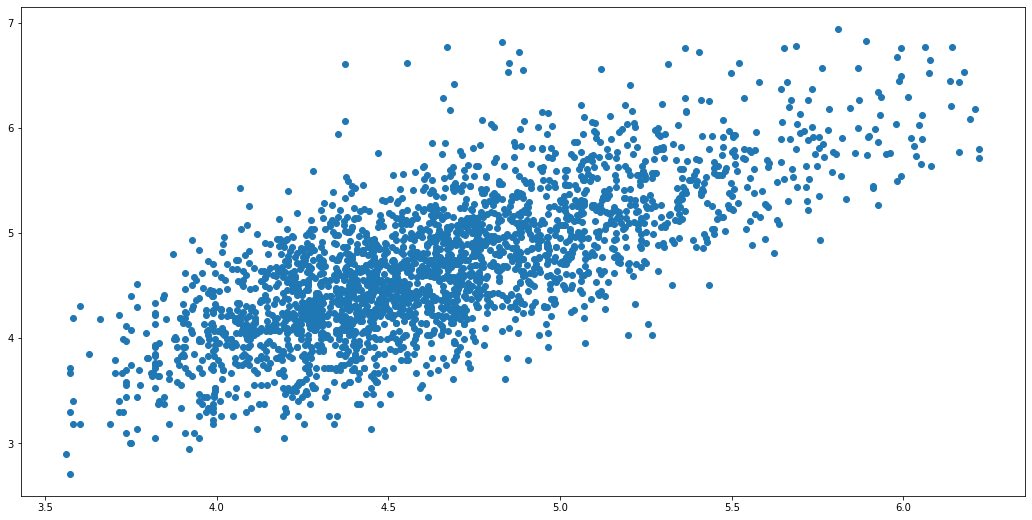

In [509]:
KN_model=KNeighborsRegressor(n_neighbors=11)
KN_model.fit(x_train,y_train)
KN_predicted=KN_model.predict(x_train)
plt.figure(figsize=(18,9))
plt.scatter(KN_predicted,y_train)
plt.show()


In [510]:
KN_model.score(x_train,y_train)

0.5284400033536625

In [511]:
KN_model.score(x_test,y_test)

0.4635333075363266

Trainin with LinearRegression

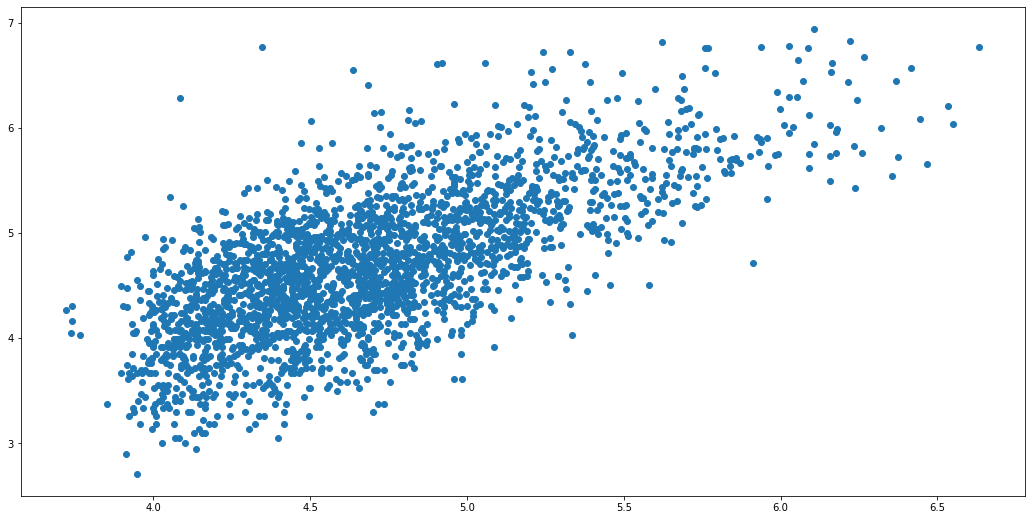

In [512]:
Lin_model=LinearRegression()
Lin_model.fit(x_train,y_train)
Lin_model_predicted=Lin_model.predict(x_train)
plt.figure(figsize=(18,9))
plt.scatter(Lin_model_predicted,y_train)
plt.show()


In [513]:
Lin_model.score(x_test,y_test)

0.49390405624513745

Training with Random Forest Regressor

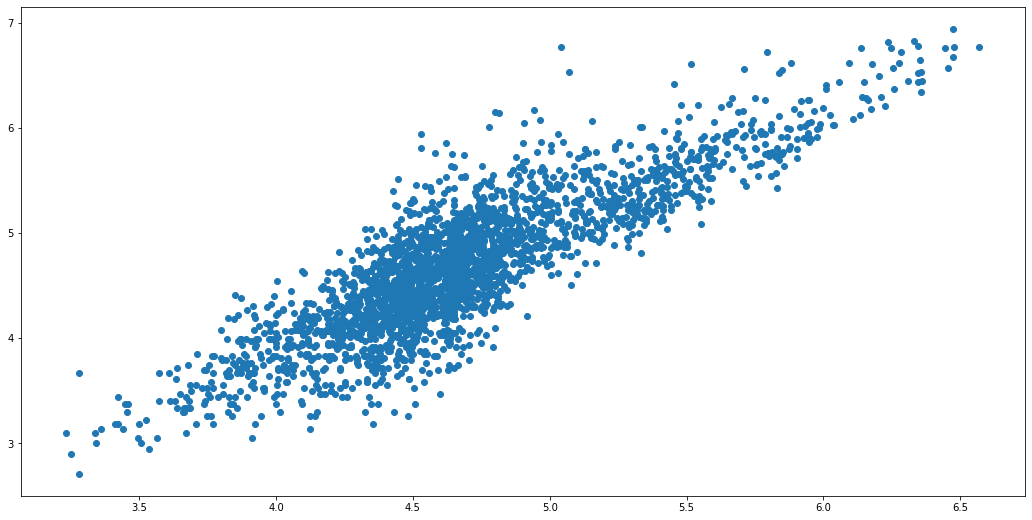

In [514]:
Forest_model=RandomForestRegressor(max_depth=12, random_state=0)
Forest_model.fit(x_train,y_train)
Forest_model_predicted=Forest_model.predict(x_train)
plt.figure(figsize=(18,9))
plt.scatter(Forest_model_predicted,y_train)
plt.show()

In [515]:
Forest_model.score(x_test,y_test)

0.5279954314553192

In [516]:
Forest_model.score(x_train,y_train)

0.7293967299625477

                                    PERFORMANCE EVALUATION

I have implemented three different algorithms on the boat data to create a model for predicting number of boat views given Price, Length, Year built, location, manufacturer and type of the boat. The first model used K nearest neighbours alogorithm. On the training data, KNN model had a predictive power of 52%, but unfortunately it performed very poorly on the test data with 46% predictive power. The second model that I used was multiple linear regression which also had less than 50% predictive power on the test set. The last model that used was Random Forest Regression. Unsurprisingly, this model performed much better on both training and test sets. Test and training scores were 53% and 72% respectively.

                                    PERFORMANCE IMPROVOMENT

Although, I have achieved 53% predictive power on the test set, there are lots of things that can be done further for the performance improvement. We can collect more data as the time passes and retrain our model to keep it up to date. On top of that, we can think about collecting data on additional factors. For instance, site visitors are more likely to view boats that has high number of historical views. Moreover, in my model I didn't make any currency conversions for the price feature and assumed that all prices were in euros. It doesn't make sense to make conversions with the current exhcange rates and it is very difficult to gather back then exchange rates to make correct conversios.